In [1]:

import numpy as np
from typing import Tuple, List
import networkx as nx

from auto_robot_design.description.kinematics import JointPoint
from auto_robot_design.description.builder import add_branch
from auto_robot_design.description.utils import draw_joint_point

In [3]:
np.array([1,2,3])

array([1, 2, 3])

In [27]:
def build_standard_two_linker(variant:int = 2,nominal_length = 1, right_shift = np.tan(np.pi/6)/2):
    ground_joint = JointPoint(
        r=np.zeros(3),
        w=np.array([0, 1, 0]),
        attach_ground=True,
        active=True,
        name="TL_ground"
    )
    graph_dict = {"TL_ground":ground_joint}
    branch = [ground_joint]
    if variant not in (1,2,3): raise Exception("wrong variant!")
    knee_joint_pos = np.array([right_shift, 0, -variant * 0.25])
    knee_joint = JointPoint(r=knee_joint_pos, w=np.array([0, 1, 0]), name=f"TL_knee")
    branch.append(knee_joint)
    graph_dict["TL_knee"] = knee_joint
    ee = JointPoint(
        r=np.array([0,0,-1]),
        w=np.array([0, 1, 0]),
        attach_endeffector=True,
        name="TL_ee"
    )
    graph_dict["TL_ee"] = ee
    branch.append(ee)
    graph = nx.Graph()
    add_branch(graph, branch)
    return graph, graph_dict




In [14]:
False * 5.0


0.0

In [35]:
def add_tl_branch(graph, graph_dict, inner:bool = True, shift = 0.25, ground:bool = True):
    knee_joint:JointPoint = graph_dict["TL_knee"]
    knee_pos = knee_joint.r
    ee:JointPoint = graph_dict["TL_ee"]
    ee_pos = ee.r
    connection_point = (ee_pos + knee_pos)/2
    if inner:
        branch_knee_pos = knee_pos + np.array([-knee_pos[0]-shift,0,0])
    else:
        branch_knee_pos = knee_pos + np.array([shift,0,0])

    branch_knee_joint = JointPoint(r=branch_knee_pos,
        w=np.array([0, 1, 0]),
        name="TL_branch_knee")
    branch_connection = JointPoint(r=connection_point,
        w=np.array([0, 1, 0]),
        name="TL_branch_connection")
    
    if ground:
        ground_connection = np.array([branch_knee_pos[0],0,0])
        branch_ground_joint = JointPoint(r=ground_connection,
            w=np.array([0, 1, 0]),
            attach_ground=True,
            active=True,
            name="TL_branch_ground")
        add_branch(graph, [branch_ground_joint, branch_knee_joint, branch_connection,[knee_joint, ee]])
        return graph
    else:
        ground_joint:JointPoint = graph_dict["TL_ground"]
        ground_connection = (ground_joint.r+knee_pos)/2
        branch_ground_joint = JointPoint(r=ground_connection,
            w=np.array([0, 1, 0]),
            active=True,
            name="TL_branch_ground")
        add_branch( graph, [[ground_joint, knee_joint],branch_ground_joint, branch_knee_joint, branch_connection,[knee_joint, ee]])
        return graph



In [48]:
def add_fl_branch(graph, graph_dict, inner:bool = True, shift = 0.25, ground:bool = True, variant = 2):
    knee_joint:JointPoint = graph_dict["TL_knee"]
    knee_pos = knee_joint.r
    ee:JointPoint = graph_dict["TL_ee"]
    ee_pos = ee.r
    ground_joint:JointPoint = graph_dict["TL_ground"]
    ground_pos = ground_joint.r

    connection_point = (ee_pos + knee_pos)/2
    if inner:
        branch_knee_pos = connection_point+ np.array([-connection_point[0]-shift,0,0])
    else:
        branch_knee_pos = connection_point+ np.array([-connection_point[0] + knee_pos[0]+shift,0,0])
    
    upper_connection_point = (ground_pos + knee_pos)/2
    if inner:
        branch_hip_pos = upper_connection_point + np.array([-upper_connection_point[0]-shift,0,0])
    else:
        branch_hip_pos = upper_connection_point+ np.array([-upper_connection_point[0] + knee_pos[0]+shift,0,0])
    
    branch_hip_joint = JointPoint(r=branch_hip_pos,
        w=np.array([0, 1, 0]),
        name="FL_branch_hip")
    branch_knee_joint = JointPoint(r=branch_knee_pos,
        w=np.array([0, 1, 0]),
        name="FL_branch_knee")
    branch_connection = JointPoint(r=connection_point,
        w=np.array([0, 1, 0]),
        name="FL_branch_connection")
    
    if ground:
        branch_ground_connection = np.array([branch_hip_pos[0], 0, 0])
        branch_ground_joint = JointPoint(r=branch_ground_connection,
        w=np.array([0, 1, 0]),
        active=True,
        attach_ground=True)
        branch =[branch_ground_joint, branch_hip_joint, branch_knee_joint, branch_connection]
        add_branch(graph,[branch_ground_joint, branch_hip_joint, branch_knee_joint, branch_connection,[knee_joint, ee]])

        upper_connection_joint = JointPoint(r=upper_connection_point,
        w=np.array([0, 1, 0]),
        name="FL_branch_addition_connection")

        addition_initial_pos = (branch[variant].r+branch[variant-1].r)/2
        addition_initial_joint = JointPoint(r=addition_initial_pos,
        w=np.array([0, 1, 0]),
        name="FL_branch_addition_initial")
        add_branch(graph,[[branch[variant],branch[variant-1]], addition_initial_joint, upper_connection_joint, [ground_joint, knee_joint]])
        return graph
    else:
        

        

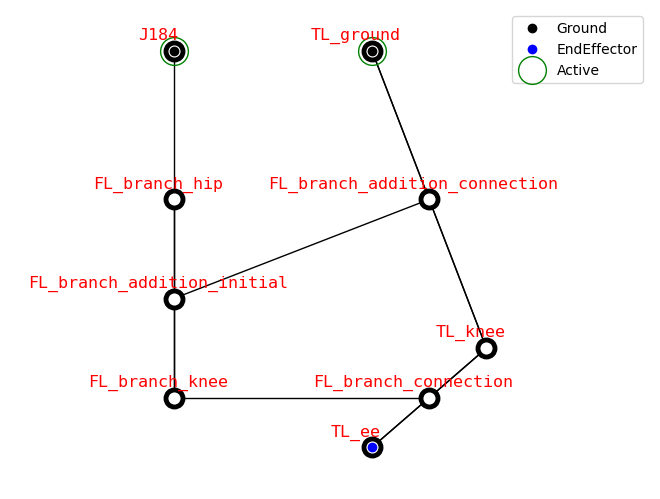

In [55]:
graph, graph_dict = build_standard_two_linker(variant=3)
#add_tl_branch(graph, graph_dict,ground=True, inner=False)
add_fl_branch (graph, graph_dict,ground=True, inner=True, variant =2, shift = 0.5)
draw_joint_point(graph)